In [1]:
import pickle
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
%matplotlib inline


### Lots of code in this notebook is modified from corse solutions from METIS

In [2]:
movie_data = pickle.load(open('movie_data.pkl','rb'))

In [3]:
df = pd.DataFrame(movie_data)

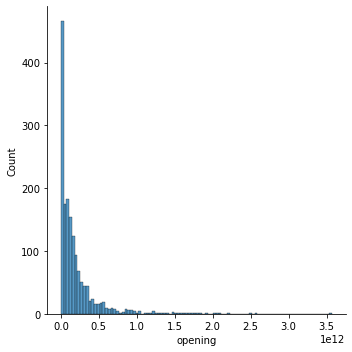

In [4]:
sns.displot(df, x = 'opening')

In [5]:
df['roi'] = (df.domestic_total_gross+df.international_gross)/df.budget
df['roi_log'] = np.log10(df.roi)
df['total_gross'] = df.domestic_total_gross+df.international_gross
df['total_gross_log'] = np.log10(df.total_gross)
df['budget_log'] = np.log10(df.budget)
df['opening_log'] = np.log10(df.opening)
df['opening_rank_log'] = np.log10(df.opening_rank)
df['day_of_year'] = df.release_date.apply(lambda x: x.timetuple().tm_yday)
df['day_of_week'] = df.release_date.apply(lambda x: x.timetuple().tm_wday)
df['number_of_reviewers'] = df.rating_dict.apply(lambda x: x['all_all'][1])
df['number_of_reviewers_log'] = np.log10(df.number_of_reviewers)
df['days_since_release'] = (datetime.date(2022,2,1)-df.release_date.apply(lambda x: x.date())).apply(lambda x: x.days)

In [6]:
df['number_of_women'] = df.rating_dict.apply(lambda x: x['women_all'][1])
df['number_of_men'] = df.rating_dict.apply(lambda x: x['men_all'][1])
df['imdb_rating_women'] = df.rating_dict.apply(lambda x: x['women_all'][0])
df['imdb_rating_men'] = df.rating_dict.apply(lambda x: x['men_all'][0])

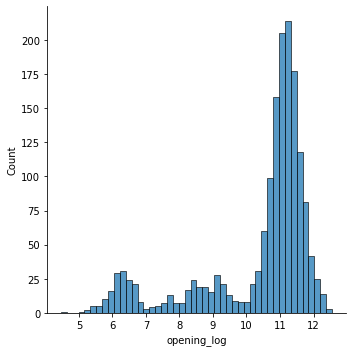

In [7]:
sns.displot(df,x = 'opening_log')

In [8]:
len(df)

1673

### Looks like there are 3 to 4 levels of openings for movies on a log scale

# Normalizing our Dependant Variable

In [9]:
sns.displot(df,x = 'number_of_reviewers')

In [10]:
sns.displot(df,x = 'number_of_reviewers')

<AxesSubplot:xlabel='days_since_release', ylabel='number_of_reviewers_log'>

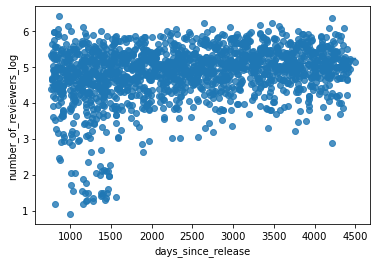

In [11]:
sns.regplot(x = 'days_since_release', y = 'number_of_reviewers_log', data = df)

In [12]:
X = df['days_since_release']
X = sm.add_constant(X)

y = df['number_of_reviewers_log']

movie_model = OLS(y,X)
results = movie_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     number_of_reviewers_log   R-squared:                       0.073
Model:                                 OLS   Adj. R-squared:                  0.073
Method:                      Least Squares   F-statistic:                     131.9
Date:                     Tue, 22 Feb 2022   Prob (F-statistic):           1.90e-29
Time:                             16:25:02   Log-Likelihood:                -1886.7
No. Observations:                     1673   AIC:                             3777.
Df Residuals:                         1671   BIC:                             3788.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3378      0.045     95.697      0.000       4.249       4.427
days_since_release     0.0002   1.71e-05     11.486      0.000       0.000       0.000
==============================================================================
Omnibus:                      500.633   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1691.302
Skew:                          -1.466   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
results.params

const                 4.337791
days_since_release    0.000196
dtype: float64

<AxesSubplot:xlabel='days_since_release', ylabel='number_of_reviewers'>

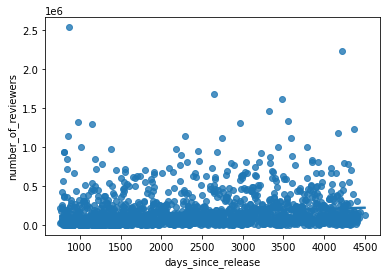

In [14]:
sns.regplot(x = 'days_since_release', y = 'number_of_reviewers', data = df)

In [15]:
X = df['days_since_release']
X = sm.add_constant(X)

y = df['number_of_reviewers']

movie_model = OLS(y,X)
results = movie_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_reviewers   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     31.68
Date:                 Tue, 22 Feb 2022   Prob (F-statistic):           2.13e-08
Time:                         16:25:02   Log-Likelihood:                -22948.
No. Observations:                 1673   AIC:                         4.590e+04
Df Residuals:                     1671   BIC:                         4.591e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.491e+04   1.33e+04      7.140      0.000    6.88e+04    1.21e+05
days_since_release    28.1602      5.003      5.628      0.000      18.347      37.974
==============================================================================
Omnibus:                     1291.083   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30419.093
Skew:                           3.441   Prob(JB):                         0.00
Kurtosis:                      22.724   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

looks like log does a good job of looking at reviews

In [16]:
### Normalizing number of reviewers
df['number_of_reviewers_log_norm'] = ((df.number_of_reviewers_log-4.337791)-
                                      (df.days_since_release*0.000196))+4.337791

In [17]:
### changing unnits back to number of reviewers
df['number_of_reviewers_norm'] = df.number_of_reviewers_log_norm.apply(lambda x: 10**x)

<AxesSubplot:xlabel='days_since_release', ylabel='number_of_reviewers_log_norm'>

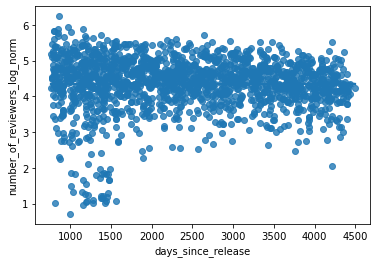

In [18]:
sns.regplot(x = 'days_since_release', y = 'number_of_reviewers_log_norm', data = df)

In [19]:
sns.displot(df,x = 'number_of_reviewers_log_norm')

In [20]:
df.columns

Index(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor', 'budget',
       'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log', 'days_since_release',
       'number_of_women', 'number_of_men', 'imdb_rating_women',
       'imdb_rating_men', 'number_of_reviewers_log_norm',
       'number_of_reviewers_norm'],
      dtype='object')

# Creating our Target Variables

In [21]:
df['target'] = df.number_of_reviewers*df.imdb_user_score
df['target_log'] = np.log10(df.number_of_reviewers*df.imdb_user_score)
df['target_men'] = df.number_of_men*df.imdb_rating_men
df['target_men_log'] = np.log10(df.number_of_men*df.imdb_rating_men)
df['target_women'] = df.number_of_women*df.imdb_rating_women
df['target_women_log'] = np.log10(df.number_of_women*df.imdb_rating_women)
df['target_norm'] = df.number_of_reviewers_norm*df.imdb_user_score
df['target_norm_log'] = np.log10(df.number_of_reviewers_norm*df.imdb_user_score)
df['target_2'] = df.number_of_reviewers_log_norm*df.imdb_user_score

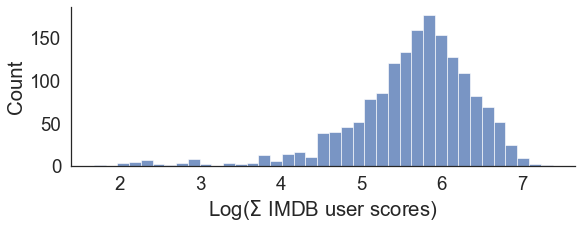

In [22]:
sns.set(style = "white", font_scale = 1.7)
#sns.set(font_scale = 1)
ax = sns.displot(df,x = 'target_log')

ax.set(xlabel = ('Log('+r"$\Sigma$ IMDB user scores)"))
plt.gcf().set_size_inches(10, 3)

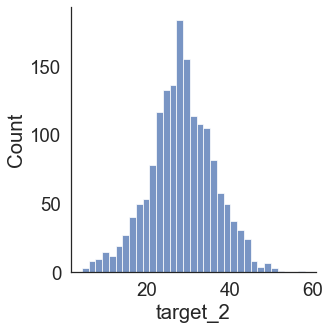

In [23]:
sns.displot(df,x = 'target_2')

In [24]:
df.columns

Index(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor', 'budget',
       'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log', 'days_since_release',
       'number_of_women', 'number_of_men', 'imdb_rating_women',
       'imdb_rating_men', 'number_of_reviewers_log_norm',
       'number_of_reviewers_norm', 'target', 'target_log', 'target_men',
       'target_men_log', 'target_women', 'target_women_log', 'target_norm',
       'target_norm_log', 'target_2'],
      dtype='object')

In [25]:
df.iloc[0].index.values

array(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor',
       'budget', 'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log',
       'days_since_release', 'number_of_women', 'number_of_men',
       'imdb_rating_women', 'imdb_rating_men',
       'number_of_reviewers_log_norm', 'number_of_reviewers_norm',
       'target', 'target_log', 'target_men', 'target_men_log',
       'target_women', 'target_women_log', 'target_norm',
       'target_norm_log', 'target_2'], dtype=object)

In [26]:
genre_counter = {}
for x in df.genres:
    if type(x) == type(float('nan')):
        pass
    for y in x:
        if type(y) == type(float('nan')):
            continue
        if y in genre_counter:
            genre_counter[y] += 1
        else:
            genre_counter[y] = 1

In [27]:
gen_list = list(genre_counter.items())
gen_list = sorted(gen_list, key = lambda x:-x[1])

In [28]:
#### making genre dummies
for x in gen_list:
    dis_list = []
    for y in df.genres:
        if x[0] in y:
            dis_list.append(1)
        else:
            dis_list.append(0)
    df[x[0]] = dis_list

In [29]:
#### making re issue dummies
dis_list = []
for y in df.movie_title:
    if y.endswith(' Re'):
        dis_list.append(1)
    else:
        dis_list.append(0)
df['re_issue'] = dis_list

In [30]:
### making length dummies
dis_list = []
for y in df.runtime_minutes:
    if y < 90:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['short_movie'] = dis_list

dis_list = []
for y in df.runtime_minutes:
    if y > 130:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['long_movie'] = dis_list

dis_list = []
for y in df.runtime_minutes:
    if y <= 130 and y>=90:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['ave_movie'] = dis_list

In [31]:
### making rating dummies
df = df.join(pd.get_dummies(df['rating']))

In [32]:
### making length dummies
dis_list = []
for y in df.opening_log:
    if y < 7:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['opening_low'] = dis_list

dis_list = []
for y in df.opening_log:
    if y >= 7 and y<=10:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['opening_mid'] = dis_list

dis_list = []
for y in df.opening_log:
    if y>10:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['opening_high'] = dis_list


In [33]:
dis_list = []
for index, y in df.iterrows():
    if y.opening_low ==1:
        dis_list.append('low_opening')
    elif y.opening_mid ==1:
        dis_list.append('mid_opening')
    elif y.opening_high ==1:
        dis_list.append('high_opening')
    else:
        dis_list.append(float('nan'))
df['opening_categories'] = dis_list

In [34]:
len(dis_list)

1673

In [35]:
sm_df = df[df['re_issue']==0]
df_no_re = df[df['re_issue']==0]

sm_df = sm_df[['movie_title',
            'target_log',
            'total_gross_log',
            'budget_log',
            'opening_log',
            'metascore',
            'imdb_user_score',
            'opening_categories',
            'rating',
            'number_of_reviewers_log']].copy()

In [36]:
sm_df_re = df[df['re_issue']==1]
sm_df_re = sm_df[['movie_title',
            'target_log',
            'total_gross_log',
            'budget_log',
            'opening_log',
            'metascore',
            'imdb_user_score',
            'opening_categories',
            'rating',
            'number_of_reviewers_log']].copy()

In [37]:
sm_df.sort_values(by = 'target_log').iloc[1550:]

movie_title  target_log  \
1289                                Doctor Strange    6.705176   
518                               Edge of Tomorrow    6.707985   
1294                                 Black Panther    6.711200   
608                             The Social Network    6.714146   
432                                              X    6.714240   
147                                   Man of Steel    6.715887   
1221                                       Arrival    6.716172   
1602                                       Skyfall    6.723539   
1064                          The King's Speech PG    6.725856   
547                              The King's Speech    6.725864   
863                        Silver Linings Playbook    6.726473   
255                                 Thor: Ragnarok    6.728754   
261                                      Prisoners    6.729371   
1256                                    Iron Man 2    6.731031   
144                                              X    6.736508   
163                                     Inside Out    6.736957   
1500                              12 Years a Slave    6.739085   
67              Captain America: The First Avenger    6.745118   
1558                                          Thor    6.750879   
755                       How to Train Your Dragon    6.758890   
550                     Captain America: Civil War    6.759500   
776                                          Logan    6.760673   
265                                     Iron Man 3    6.761187   
1321                            The Imitation Game    6.769984   
827                                     Black Swan    6.770579   
406                        Avengers: Age of Ultron    6.775398   
403                                   The Revenant    6.786600   
839                                       Parasite    6.788048   
739            Captain America: The Winter Soldier    6.790434   
475                                        Gravity    6.791800   
1644             The Hobbit: An Unexpected Journey    6.792605   
560                       The Grand Budapest Hotel    6.793576   
1350                              The Hunger Games    6.806112   
543                                    The Martian    6.814488   
335                                    Toy Story 3    6.817988   
236   Harry Potter and the Deathly Hallows: Part 2    6.827511   
320              Die Hard 30th Anniversary Release    6.842078   
437                         Star Wars: Episode VII    6.845953   
1639                Monsters, Inc. 2012 3D Release    6.847912   
788                                      Gone Girl    6.878971   
1260                            Mad Max: Fury Road    6.887062   
1503                                      Deadpool    6.892979   
1144                  Finding Nemo 2012 3D Release    6.909997   
1212                          Friendsgiving Day #2    6.914139   
455                         Avengers: Infinity War    6.914173   
9                             Friendsgiving Day #1    6.914242   
836                              Avengers: Endgame    6.927656   
228                  The Lion King 2011 3D Release    6.932667   
914                        Titanic 2012 3D Release    6.940898   
1231                       Guardians of the Galaxy    6.953082   
1579                   Avatar 2010 Special Edition    6.963158   
470                                          Joker    6.980668   
889             Back To The Future Day Triple Bill    6.986848   
554                                 Shutter Island    7.004923   
159                                   The Avengers    7.029110   
526                        The Wolf of Wall Street    7.031291   
1071                              Django Unchained    7.090851   
1531                         The Dark Knight Rises    7.132331   
569                                   Interstellar    7.160905   
217                                      Inception    7.292866   

      total_

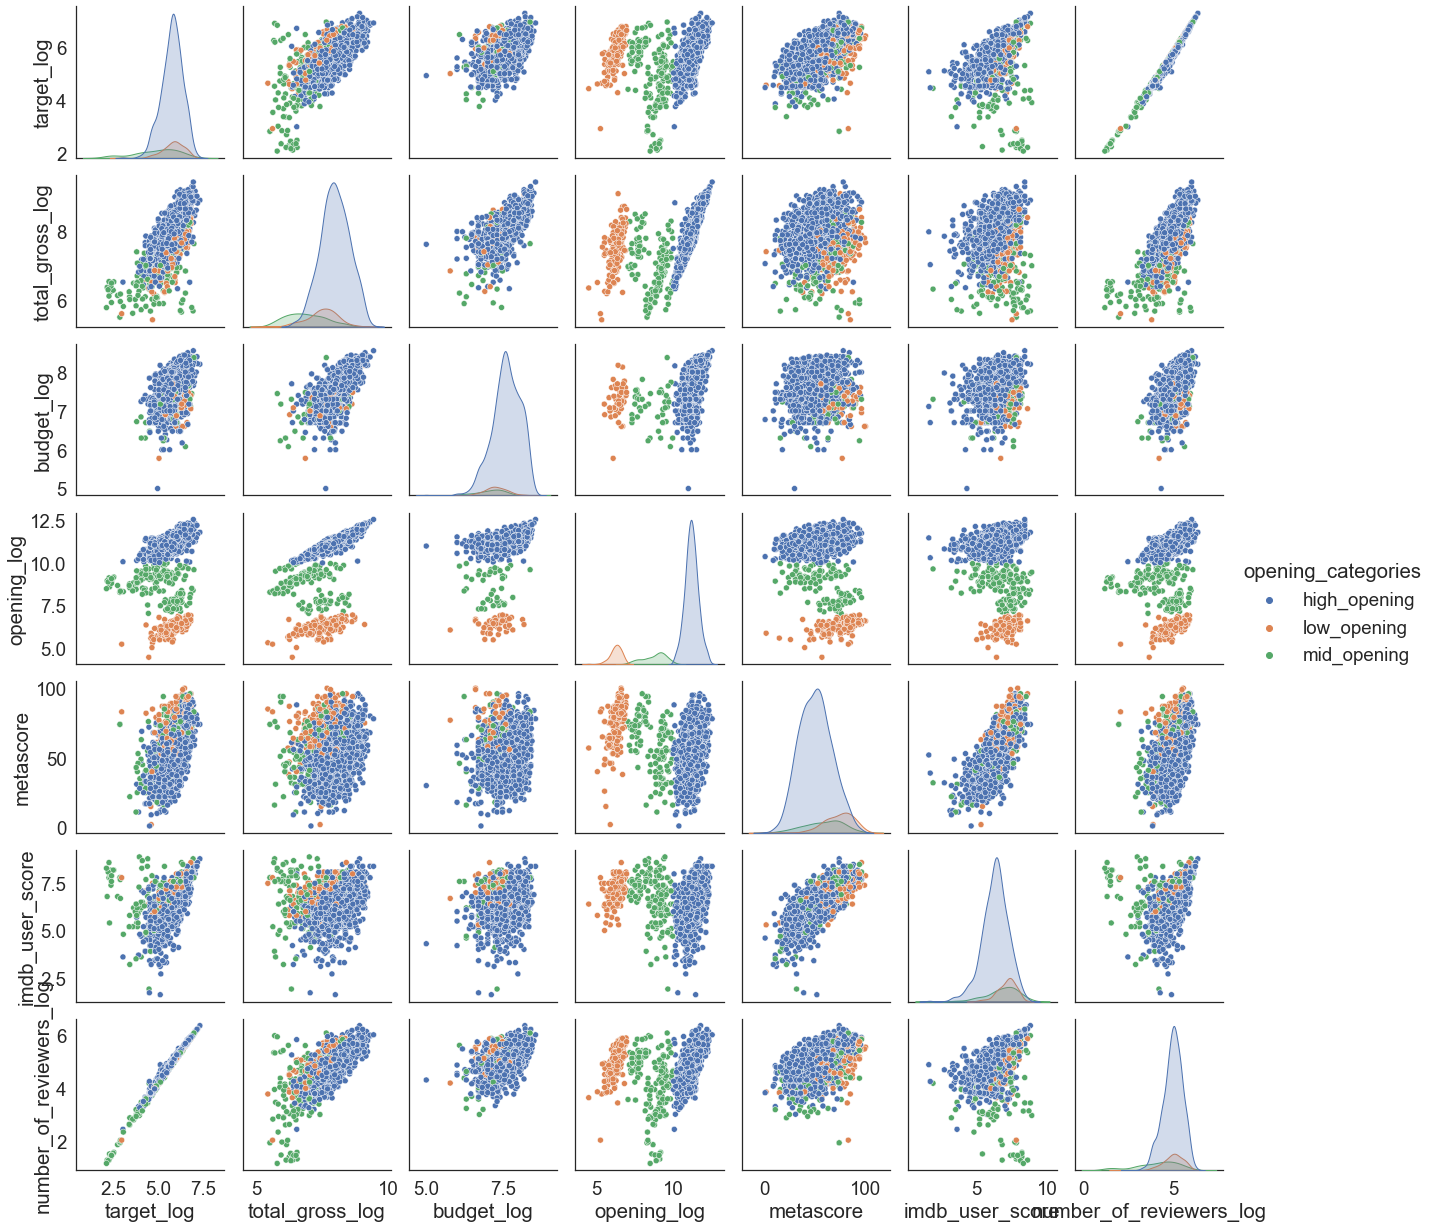

In [38]:
sns.pairplot(sm_df, hue = 'opening_categories')

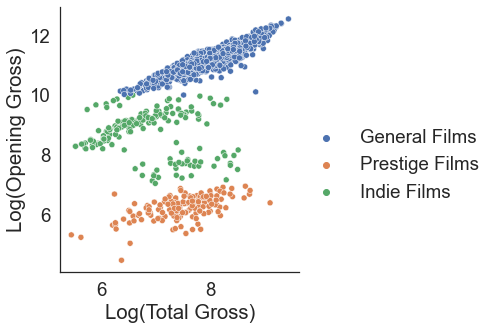

In [39]:
g = sns.relplot(data = sm_df,
            x = 'total_gross_log', 
            y='opening_log' , 
            hue = 'opening_categories')

#plt.title("Grid Search Lasso Model")
plt.xlabel('Log(Total Gross)')
plt.ylabel('Log(Opening Gross)')

# title
new_title = ''
g._legend.set_title(new_title)
# replace labels
new_labels = ['General Films', 'Prestige Films', 'Indie Films']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
#plt.gcf().set_size_inches(7, 5)

In [40]:
x_gen = 'Horror'

sm_df_h = df[df['re_issue']==0]
sm_df_h = sm_df_h[['movie_title',
            'total_gross_log',
            'budget_log',
            'opening_log',
            'roi_log',
            'metascore',
            'imdb_user_score',
            'opening_categories',
            'day_of_year',
            x_gen,
            'rating']].copy()

sns.pairplot(sm_df_h, hue = x_gen)



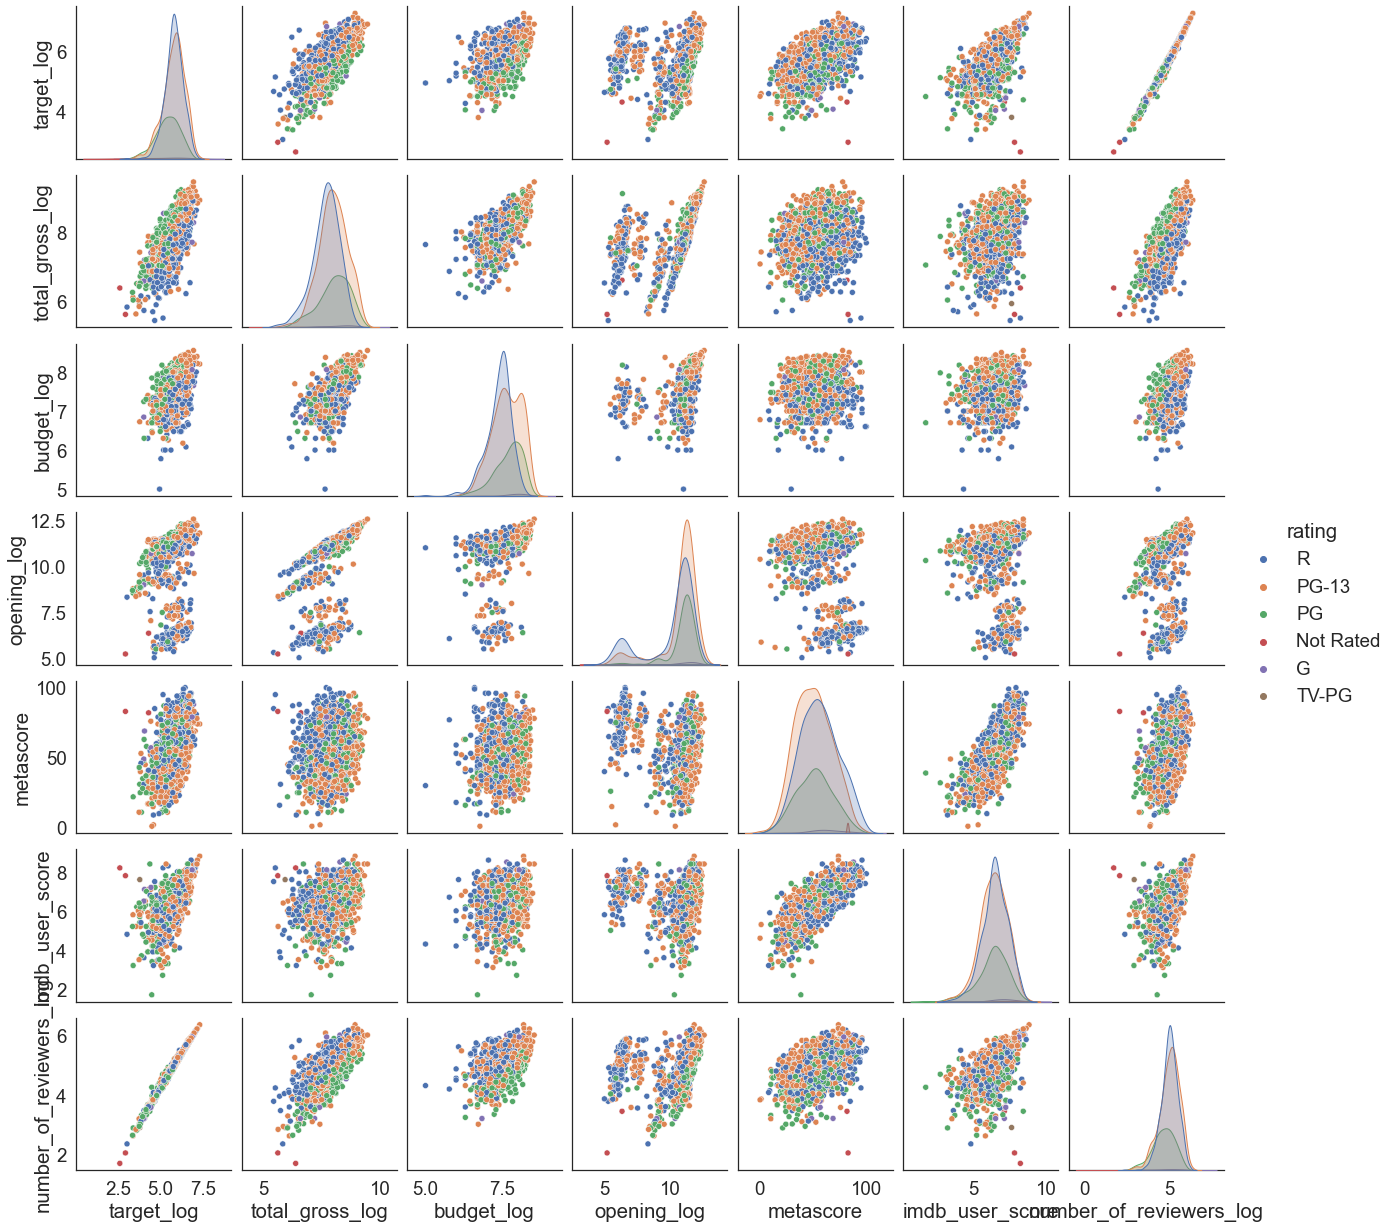

In [41]:
sns.pairplot(sm_df, hue = 'rating')

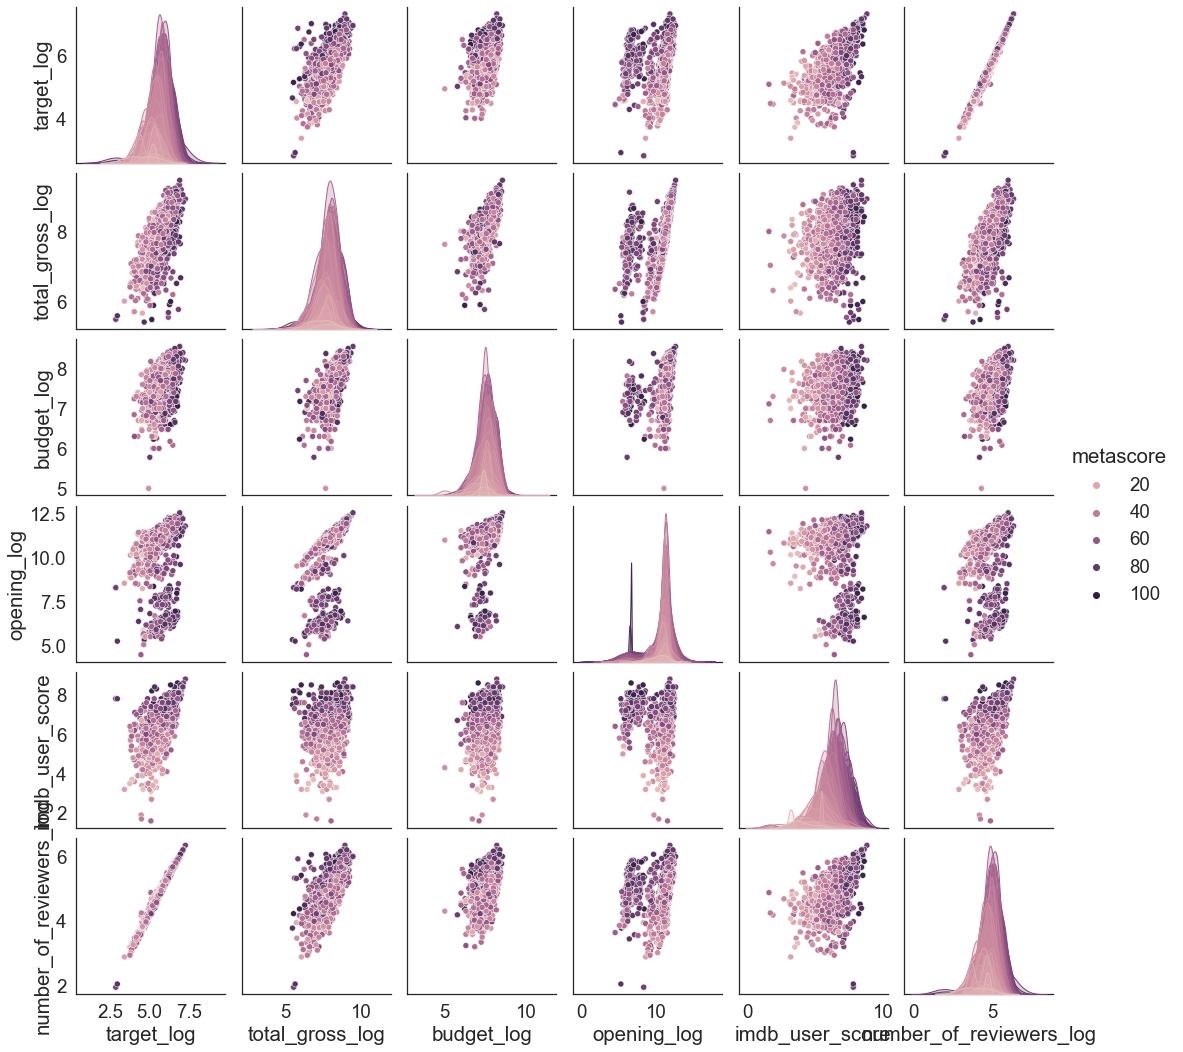

In [42]:
sns.pairplot(sm_df, hue = 'metascore')

In [43]:
sns.heatmap(sm_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [44]:
### budget ends up not mattering
df2 = df_no_re[df.budget.notna()].copy()

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_57651/661987608.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df_no_re[df.budget.notna()].copy()


In [45]:
df2 = df2.dropna().reset_index()

In [47]:
len(df) - len(df2)

590

# Splitting Test and Train Data

In [46]:
features = df2.drop(columns = ['imdb_user_score',
                               'rating_dict',
                               'rating_dist_dict',
                               'number_of_reviewers',
                               'number_of_reviewers_log',
                               'number_of_reviewers',
                               'number_of_reviewers_log_norm',
                               'number_of_reviewers_norm',
                               'target',
                               'target_log',
                               'target_norm',
                               'target_norm_log','target_2',
                               'target_men','target_men_log',
                               'target_women','target_women_log']) 

targets = df2[['movie_title',
                   'imdb_user_score',
                   'rating_dict',
                   'rating_dist_dict',
                   'number_of_reviewers',
                   'number_of_reviewers_log',
                   'number_of_reviewers',
                   'number_of_reviewers_log_norm',
                   'number_of_reviewers_norm',
                   'target',
                   'target_log',
                   'target_norm',
                   'target_norm_log','target_2',
                   'target_men','target_men_log',
                   'target_women','target_women_log']]

In [47]:
X, X_test, y, y_test = train_test_split(features, 
                                        targets, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

# Normalizing Data

In [48]:
normalized_list = ['domestic_total_gross', 'international_gross',
       'runtime_minutes', 'budget',
       'opening', 'widest_release', 'opening_rank',
       'metascore','roi', 'roi_log', 'total_gross', 
       'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log','days_since_release']

In [49]:
X_train_n = X_train[['movie_title']]
for c in normalized_list:
    X_train_n[c] = X_train[c].apply(lambda x: (x-X_train[c].mean())/X_train[c].std())
X_train_n = pd.concat([X_train_n, X_train.drop(columns = normalized_list)], axis=1, join="inner")

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_44329/2334309304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_n[c] = X_train[c].apply(lambda x: (x-X_train[c].mean())/X_train[c].std())


In [50]:
X_val_n = X_val[['movie_title']]
for c in normalized_list:
    X_val_n[c] = X_val[c].apply(lambda x: (x-X_val[c].mean())/X_val[c].std())
X_val_n = pd.concat([X_val_n, X_val.drop(columns = normalized_list)], axis=1, join="inner")

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_44329/3350691571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val_n[c] = X_val[c].apply(lambda x: (x-X_val[c].mean())/X_val[c].std())


# Building Model

### Baseline: Linear Regression

In [51]:
X_train_n.columns

Index(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'budget', 'opening', 'widest_release',
       'opening_rank', 'metascore', 'roi', 'roi_log', 'total_gross',
       'total_gross_log', 'budget_log', 'opening_log', 'opening_rank_log',
       'days_since_release', 'index', 'movie_title', 'rating', 'release_date',
       'distributor', 'genres', 'day_of_year', 'day_of_week',
       'number_of_women', 'number_of_men', 'imdb_rating_women',
       'imdb_rating_men', 'Drama', 'Comedy', 'Action', 'Thriller', 'Adventure',
       'Fantasy', 'Romance', 'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror',
       'Animation', 'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
       'Documentary', 'Western', 'Film-Noir', 're_issue', 'short_movie',
       'long_movie', 'ave_movie', 'G', 'Not Rated', 'PG', 'PG-13', 'R',
       'TV-PG', 'opening_low', 'opening_mid', 'opening_high',
       'opening_categories'],
      dtype='object')

In [52]:
feature_list_log = ['runtime_minutes', 'widest_release', 'metascore',
       'total_gross_log', 'budget_log', 'opening_log', 'opening_rank_log',
       'day_of_year', 'day_of_week', 'days_since_release', 
       'Drama','Comedy', 'Action', 'Thriller', 'Adventure', 'Fantasy', 'Romance',
       'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror', 'Animation',
       'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
       'Documentary', 'Western', 'Film-Noir', 're_issue', 'short_movie',
       'long_movie', 'G', 'PG', 'PG-13', 'R',
       'TV-PG', 'opening_low', 'opening_high']

feature_list_lin = ['runtime_minutes', 'widest_release', 'metascore',
       'total_gross', 'budget', 'opening', 'opening_rank',
       'day_of_year', 'day_of_week', 'days_since_release', 
       'Drama','Comedy', 'Action', 'Thriller', 'Adventure', 'Fantasy', 'Romance',
       'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror', 'Animation',
       'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
       'Documentary', 'Western', 'Film-Noir', 're_issue', 'short_movie',
       'long_movie', 'G', 'PG', 'PG-13', 'R',
       'TV-PG', 'opening_low', 'opening_high']

In [53]:
m = LinearRegression()
m.fit(X_train_n[feature_list_lin],y_train['target'])
m.score(X_train_n[feature_list_lin],y_train['target'])

0.5608250379256717

In [54]:
m.score(X_val_n[feature_list_lin],y_val['target'])

0.5227120047635616

Not as bad as I thought, I guess its underfit with all the variables? 

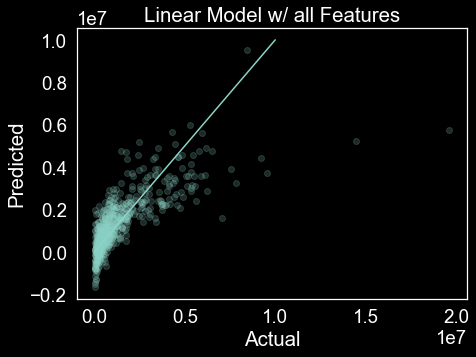

In [55]:
y_train_pred = m.predict(X_train_n[feature_list_lin])
plt.style.use('dark_background')
plt.scatter(y_train['target'], y_train_pred, alpha=0.2)
plt.plot([0, 10**7], [0, 10**7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Model w/ all Features")
plt.gcf().set_size_inches(7, 5)

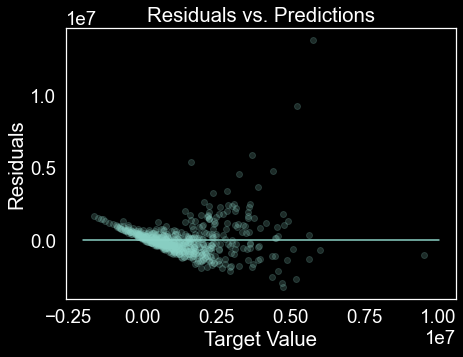

In [56]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train['target'] - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals, alpha = 0.2)
plt.plot([-2*10**6,10**7], [0, 0])
plt.title("Residuals vs. Predictions")
plt.xlabel('Target Value')
plt.ylabel('Residuals')
plt.gcf().set_size_inches(7, 5)

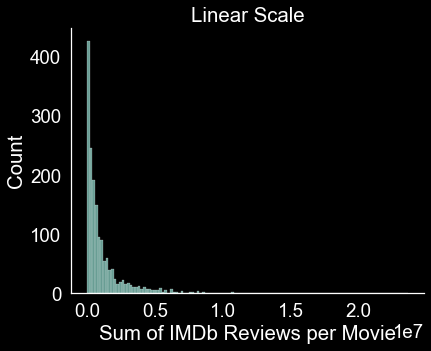

In [57]:
sns.displot(df,x = 'target')
plt.title("Linear Scale")
plt.xlabel('Sum of IMDb Reviews per Movie')
plt.ylabel('Count')
plt.gcf().set_size_inches(7, 5)

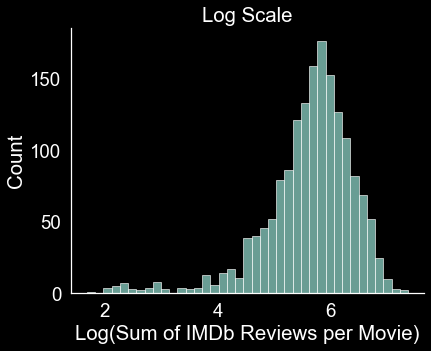

In [58]:
sns.displot(df,x = 'target_log')
plt.title("Log Scale")
plt.xlabel('Log(Sum of IMDb Reviews per Movie)')
plt.ylabel('Count')
plt.gcf().set_size_inches(7, 5)

### Try log features

In [59]:
m = LinearRegression()
m.fit(X_train_n[feature_list_log],y_train['target_log'])
m.score(X_train_n[feature_list_log],y_train['target_log'])

0.7871669314329457

In [60]:
m.score(X_val_n[feature_list_log],y_val['target_log'])

0.765439945122717

In [61]:
y_train_pred = m.predict(X_train_n[feature_list_log])

plt.scatter(y_train['target_log'], y_train_pred, alpha=0.2)
plt.plot([4, 7], [4, 7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Model w/ all Features")
plt.gcf().set_size_inches(7, 5)

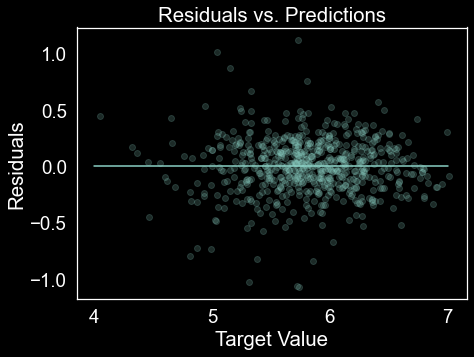

In [62]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train['target_log'] - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals, alpha = 0.2)
plt.plot([4,7], [0, 0])
plt.title("Residuals vs. Predictions")
plt.xlabel('Target Value')
plt.ylabel('Residuals')
plt.gcf().set_size_inches(7, 5)

# LASSO !

In [63]:
# Doing cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

Lasso Model:


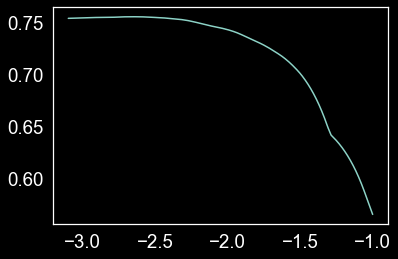

In [64]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-3.1, -1, 1000)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_n[feature_list_log], y_train['target_log'])
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log10(df.alpha), df.mean_test_score);

In [65]:
best_lasso = grid_est.best_estimator_

In [66]:
coef_df = pd.DataFrame({'features':feature_list_log,'coef':best_lasso.coef_})

In [67]:
shorter_features = feature_list_log.copy()
for row in coef_df.iterrows():
    if abs(row[1][1]) < 10**-10:
        shorter_features.remove(row[1][0])
        

In [68]:
len(shorter_features)

25

#### Lets see the impact on our linear regression

In [69]:
m = LinearRegression()
m.fit(X_train_n[shorter_features],y_train['target_log'])
m.score(X_train_n[shorter_features],y_train['target_log'])

0.783875262657699

In [70]:
m.score(X_val_n[shorter_features],y_val['target_log'])

0.7625920628700026

In [71]:
coef_df2 = pd.DataFrame({'features':shorter_features,'coef':m.coef_})
coef_df2.sort_values(by = 'coef')

features      coef
21         Documentary -0.363983
15              Family -0.276291
20               Music -0.146221
23                  PG -0.132284
22         short_movie -0.104966
13           Adventure -0.023887
5          opening_log -0.010194
7          day_of_year -0.000003
8          day_of_week  0.009462
1       widest_release  0.013849
12            Thriller  0.016370
11              Action  0.022721
6     opening_rank_log  0.029682
0      runtime_minutes  0.029789
4           budget_log  0.032127
10              Comedy  0.036998
17               Crime  0.048632
14             Fantasy  0.060807
18             Mystery  0.073631
24                   R  0.095503
19           Biography  0.100829
9   days_since_release  0.121223
16              Sci-Fi  0.135246
2            metascore  0.194154
3      total_gross_log  0.304023

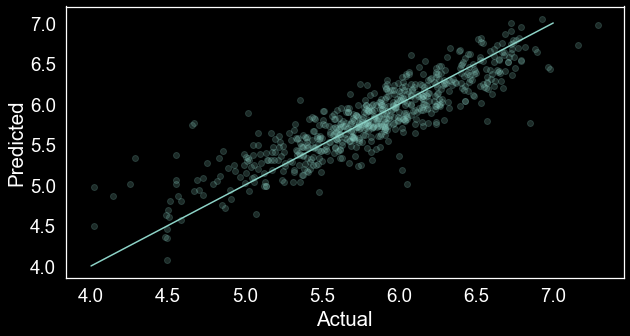

In [72]:
y_train_pred = m.predict(X_train_n[shorter_features])

plt.scatter(y_train['target_log'], y_train_pred, alpha=0.2)
plt.plot([4, 7], [4, 7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gcf().set_size_inches(10, 5)

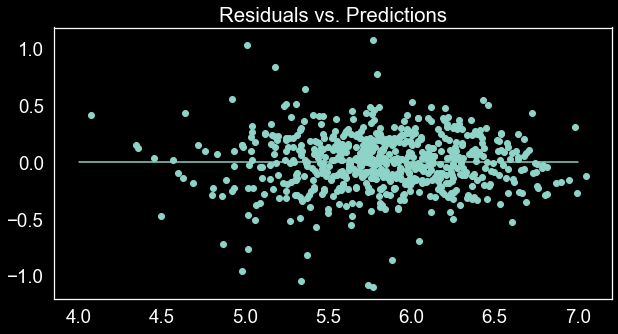

In [73]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train['target_log'] - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([4,7], [0, 0])
plt.title("Residuals vs. Predictions")
plt.gcf().set_size_inches(10, 5)

# Polynomial Features

In [74]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_n[feature_list_log])

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val_n[feature_list_log])

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train['target_log'])
lr_poly.score(X_train_poly,y_train['target_log'])

0.9700417694839365

In [75]:
lr_poly.score(X_val_poly,y_val['target_log'])

-728194562386649.8

#### Pretty clearly overfitting lets lasso it

Lasso Model:


/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.593e+00, tolerance: 1.515e-02
  model = cd_fast.enet_coordinate_descent(
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.323e+00, tolerance: 1.503e-02
  model = cd_fast.enet_coordinate_descent(
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+01, tolerance: 1.518e-02
  model = cd_fast.enet_coordinate_descent(
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+01, tolerance: 1.527e-02
  model = cd_fast.enet_coordinate_descent(
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+00, tolerance: 1.406e-02
  model = cd_fast.enet_coordinate_descent(
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+01, tolerance: 1.515e-02
  model = cd_fast.enet_coordinate_descent(
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

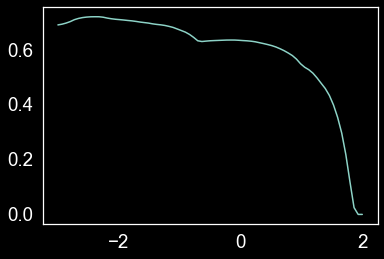

In [76]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-3, 2, 75)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_poly, y_train['target_log'])
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log10(df.alpha), df.mean_test_score);

In [77]:
best_lasso = grid_est.best_estimator_

In [78]:
best_lasso.score(X_train_poly,y_train['target_log'])

0.8381014513622892

In [79]:
best_lasso.score(X_val_poly,y_val['target_log'])

0.7597478460862288

Still being overfit compared to just the normal features

# Manually adding features

In [80]:
feature_non_categorical = ['runtime_minutes', 'widest_release', 'metascore',
       'total_gross_log', 'budget_log', 'opening_log', 'opening_rank_log',
       'day_of_year', 'day_of_week', 'days_since_release']

feature_genre = ['Drama','Comedy', 'Action', 'Thriller', 'Adventure', 'Fantasy', 'Romance',
       'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror', 'Animation',
       'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
       'Documentary', 'Western', 'Film-Noir']

feature_rating= [ 'G', 'PG-13', 'R'] # Removed PG because of dummy variable trap
feature_other = [ 're_issue', 'short_movie','long_movie','opening_low', 'opening_high']

In [81]:
feature_sm = ['opening_log','runtime_minutes', 'metascore','total_gross_log', 'days_since_release']

In [82]:
m = LinearRegression()
m.fit(X_train_n[['total_gross_log','metascore']],y_train['target_log'])
m.score(X_train_n[['total_gross_log','metascore']],y_train['target_log'])


0.5997808833914222

In [83]:
m = LinearRegression()
m.fit(X_train_n[feature_non_categorical],y_train['target_log'])
m.score(X_train_n[feature_non_categorical],y_train['target_log'])

0.681163208678244

In [84]:
rating_coef = pd.DataFrame({'Genre':feature_non_categorical,'Coeficient':m.coef_})
rating_coef.sort_values(by = 'Coeficient')

Genre  Coeficient
5         opening_log   -0.033665
6    opening_rank_log   -0.021424
1      widest_release   -0.020169
7         day_of_year   -0.000122
4          budget_log    0.005866
8         day_of_week    0.021794
0     runtime_minutes    0.106309
9  days_since_release    0.115448
2           metascore    0.183070
3     total_gross_log    0.292121

Lasso Model:


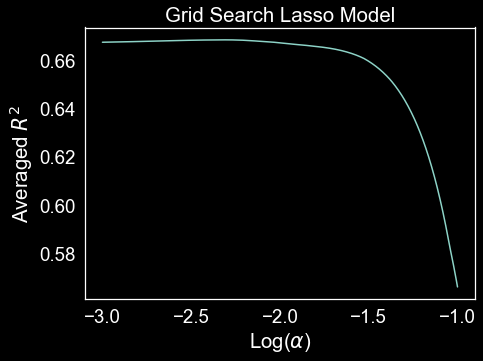

In [85]:
# Doing cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

print("Lasso Model:")
params = {
    "alpha": np.logspace(-3, -1, 1000)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_n[feature_non_categorical], y_train['target_log'])
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log10(df.alpha), df.mean_test_score);
#plt.plot(df.alpha, df.mean_test_score);
plt.title("Grid Search Lasso Model")
plt.xlabel('Log('+r'$\alpha$)')
plt.ylabel('Averaged '+r'$R^2$')
plt.gcf().set_size_inches(7, 5)

In [86]:
best_lasso = grid_est.best_estimator_

In [87]:
best_lasso.score(X_train_n[feature_non_categorical], y_train['target_log'])

0.6799744487742301

In [88]:
best_lasso.score(X_val_n[feature_non_categorical], y_val['target_log'])

0.6553341521681739

In [89]:
coef_df = pd.DataFrame({'features':feature_non_categorical,'coef':best_lasso.coef_})
cof_df = coef_df.sort_values(by = 'coef')
coef_df.style.background_gradient(cmap='magma')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'opening_log'),
  Text(1, 0, 'day_of_year'),
  Text(2, 0, 'widest_release'),
  Text(3, 0, 'budget_log'),
  Text(4, 0, 'opening_rank_log'),
  Text(5, 0, 'day_of_week'),
  Text(6, 0, 'runtime_minutes'),
  Text(7, 0, 'days_since_release'),
  Text(8, 0, 'metascore'),
  Text(9, 0, 'total_gross_log')])

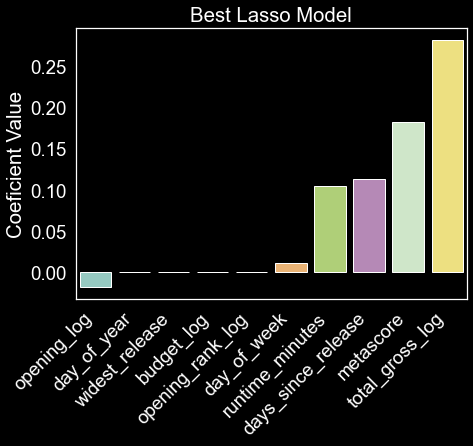

In [90]:
sns.barplot(x = 'features', y = 'coef',data = coef_df.sort_values(by = 'coef'))
plt.title("Best Lasso Model")
plt.xlabel('')
plt.ylabel('Coeficient Value')
plt.gcf().set_size_inches(7, 5)
plt.xticks(rotation = 45, ha = 'right')

In [91]:
m.score(X_val_n[feature_non_categorical],y_val['target_log'])

0.658755299160253

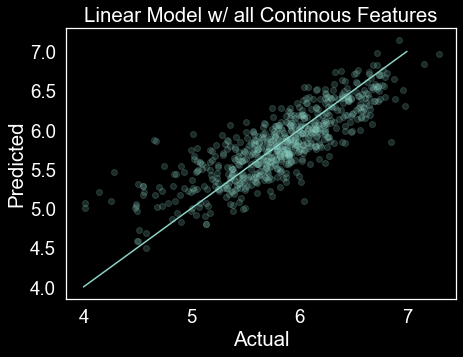

In [92]:
y_train_pred = m.predict(X_train_n[feature_non_categorical])

plt.scatter(y_train['target_log'], y_train_pred, alpha=0.2)
plt.plot([4, 7], [4, 7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Model w/ all Continous Features")
plt.gcf().set_size_inches(7, 5)

In [93]:
m = LinearRegression()
m.fit(X_train_n[feature_sm],y_train['target_log'])
m.score(X_train_n[feature_sm],y_train['target_log'])

0.6788854049059312

In [94]:
m.score(X_val_n[feature_sm],y_val['target_log'])

0.6535589846785819

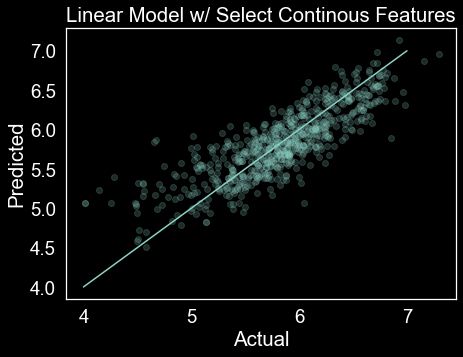

In [96]:
y_train_pred = m.predict(X_train_n[feature_sm])

plt.scatter(y_train['target_log'], y_train_pred, alpha=0.2)
plt.plot([4, 7], [4, 7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Model w/ Select Continous Features")
plt.gcf().set_size_inches(7, 5)

In [101]:
m = LinearRegression()
m.fit(X_train_n[feature_sm],y_train['target_log'])
m.score(X_train_n[feature_sm],y_train['target_log'])

0.6788854049059312

# Look at Genres

In [102]:
m = LinearRegression()
m.fit(X_train_n[feature_genre],y_train['target_log'])
m.score(X_train_n[feature_genre],y_train['target_log'])

0.22576064265234486

In [103]:
genre_coef = pd.DataFrame({'Genre':feature_genre,'coef':m.coef_})
genre_coef = genre_coef.sort_values(by = 'coef')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Documentary'),
  Text(1, 0, 'Family'),
  Text(2, 0, 'Horror'),
  Text(3, 0, 'Sport'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'History'),
  Text(6, 0, 'Musical'),
  Text(7, 0, 'Drama'),
  Text(8, 0, 'Comedy'),
  Text(9, 0, 'Film-Noir'),
  Text(10, 0, 'Romance'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Fantasy'),
  Text(13, 0, 'Crime'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Action'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'Biography'),
  Text(18, 0, 'War'),
  Text(19, 0, 'Animation'),
  Text(20, 0, 'Adventure'),
  Text(21, 0, 'Sci-Fi')])

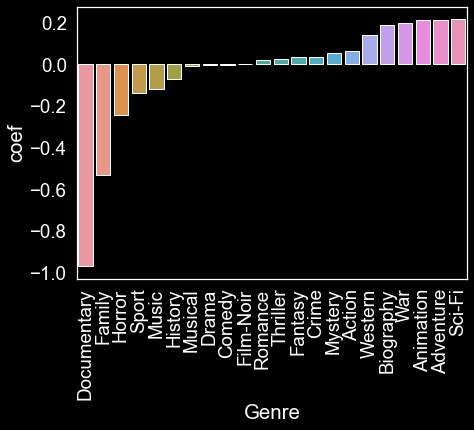

In [104]:
sns.barplot(x = 'Genre', y = 'coef',data = genre_coef)
#plt.title("Log Scale")
#plt.xlabel('Log(Sum of IMDb Reviews per Movie)')
#plt.ylabel('Count')
plt.gcf().set_size_inches(7, 5)
plt.xticks(rotation = 90)

In [105]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_n[feature_genre])

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val_n[feature_genre])

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train['target_log'])
lr_poly.score(X_train_poly,y_train['target_log'])

0.4526880992762903

In [106]:
lr_poly.score(X_val_poly,y_val['target_log'])

-1.7675539953409075e+22

# Look at MPAA

In [107]:
m = LinearRegression()
m.fit(X_train_n[feature_rating],y_train['target_log'])
m.score(X_train_n[feature_rating],y_train['target_log'])

0.0655832360551466

In [108]:
rating_coef = pd.DataFrame({'Genre':feature_rating,'coef':m.coef_})
rating_coef.sort_values(by = 'coef')

Genre      coef
0      G  0.113557
2      R  0.337681
1  PG-13  0.381288

# Combing Lists

In [109]:
m = LinearRegression()
features = feature_sm + feature_genre + feature_rating
m.fit(X_train_n[features],y_train['target_log'])
m.score(X_train_n[features],y_train['target_log'])

0.7812278171174236

In [110]:
m.score(X_val_n[features],y_val['target_log'])

0.7552226048117984

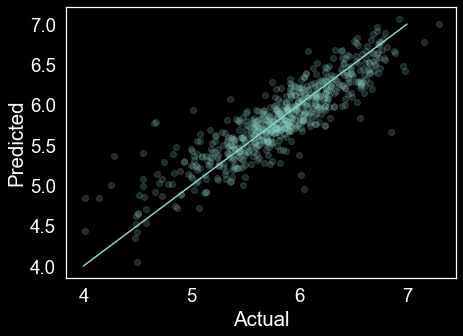

In [111]:
y_train_pred = m.predict(X_train_n[features])

plt.scatter(y_train['target_log'], y_train_pred, alpha=0.2)
plt.plot([4, 7], [4, 7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
#plt.title("Linear Model w/ all Continous Features")
plt.gcf().set_size_inches(7, 5)

In [114]:
All_coef = pd.DataFrame({'Features':features,'Coefficient':m.coef_})
All_coef = All_coef.sort_values(by = 'Coefficient',ascending = False)
All_coef.style.background_gradient(cmap='magma')

Lasso Model:


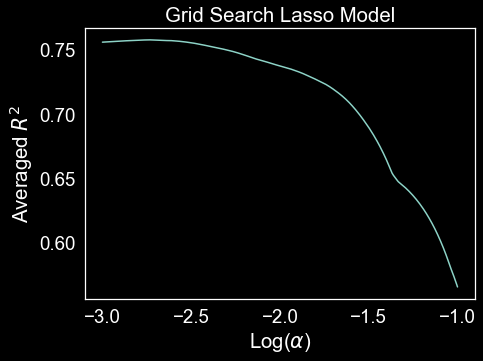

In [115]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

print("Lasso Model:")
params = {
    "alpha": np.logspace(-3, -1, 500)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_n[features], y_train['target_log'])
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log10(df.alpha), df.mean_test_score);
#plt.plot(df.alpha, df.mean_test_score);
plt.title("Grid Search Lasso Model")
plt.xlabel('Log('+r'$\alpha$)')
plt.ylabel('Averaged '+r'$R^2$')
plt.gcf().set_size_inches(7, 5)

In [116]:
best_lasso = grid_est.best_estimator_

In [117]:
best_lasso.score(X_train_n[features], y_train['target_log'])

0.7771874078646772

In [118]:
best_lasso.score(X_val_n[features], y_val['target_log'])

0.750067654519713

In [119]:
coef_df = pd.DataFrame({'features':features,'Coefficient':best_lasso.coef_})
coef_df = coef_df.sort_values(by = 'Coefficient',ascending = False)
coef_df.style.background_gradient(cmap='magma')

In [120]:
shorter_features = features.copy()
for row in coef_df.iterrows():
    if abs(row[1][1]) < 10**-10:
        shorter_features.remove(row[1][0])
#shorter_features.style.background_gradient(cmap='magma')
shorter_features

['opening_log',
 'runtime_minutes',
 'metascore',
 'total_gross_log',
 'days_since_release',
 'Comedy',
 'Action',
 'Fantasy',
 'Family',
 'Sci-Fi',
 'Crime',
 'Mystery',
 'Biography',
 'Music',
 'Documentary',
 'PG-13',
 'R']

In [121]:
m = LinearRegression()
m.fit(X_train_n[shorter_features],y_train['target_log'])
m.score(X_train_n[shorter_features],y_train['target_log'])

0.779692655421294

In [122]:
m.score(X_val_n[shorter_features],y_val['target_log'])

0.7507711439769799

In [123]:
coef_df = pd.DataFrame({'Features':shorter_features,'Coefficient':m.coef_})
coef_df = coef_df.sort_values(by = 'Coefficient',ascending = False)
coef_df.style.background_gradient(cmap='magma')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Documentary'),
  Text(1, 0, 'Family'),
  Text(2, 0, 'Music'),
  Text(3, 0, 'opening_log'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'runtime_minutes'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Biography'),
  Text(11, 0, 'days_since_release'),
  Text(12, 0, 'Sci-Fi'),
  Text(13, 0, 'PG-13'),
  Text(14, 0, 'metascore'),
  Text(15, 0, 'R'),
  Text(16, 0, 'total_gross_log')])

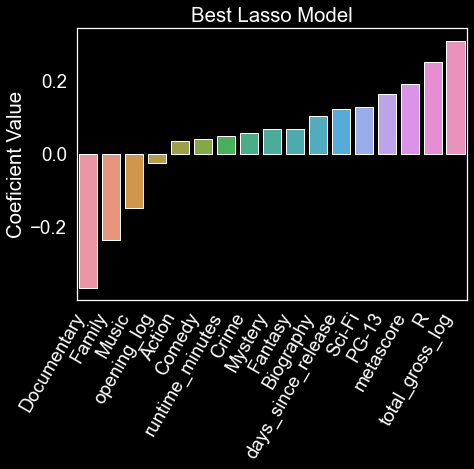

In [124]:
sns.barplot(x = 'Features', y = 'Coefficient',data = coef_df.sort_values(by = 'Coefficient'))
plt.title("Best Lasso Model")
plt.xlabel('')
plt.ylabel('Coeficient Value')
plt.gcf().set_size_inches(7, 5)
plt.xticks(rotation = 60, ha = 'right')

# Making Poly features and lassoing them

In [125]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_n[shorter_features])

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val_n[shorter_features])

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train['target_log'])
lr_poly.score(X_train_poly,y_train['target_log'])

0.8166332258257515

In [126]:
lr_poly.score(X_val_poly,y_val['target_log'])

-4.0392590839881725e+22

Lasso Model:


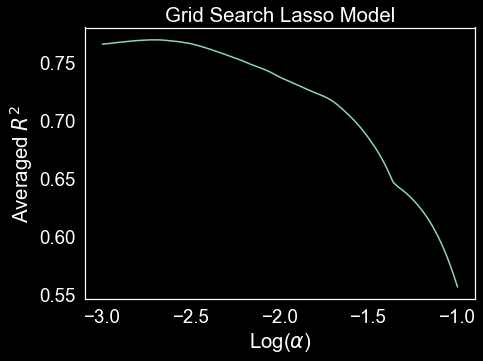

In [127]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

print("Lasso Model:")
params = {
    "alpha": np.logspace(-3, -1, 500)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_poly, y_train['target_log'])
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log10(df.alpha), df.mean_test_score);
#plt.plot(df.alpha, df.mean_test_score);
plt.title("Grid Search Lasso Model")
plt.xlabel('Log('+r'$\alpha$)')
plt.ylabel('Averaged '+r'$R^2$')
plt.gcf().set_size_inches(7, 5)

In [128]:
best_lasso = grid_est.best_estimator_

In [129]:
best_lasso.score(X_train_poly, y_train['target_log'])

0.8189575544547911

In [130]:
best_lasso.score(X_val_poly, y_val['target_log'])

0.7614349183949989

# Final Scoring

In [131]:
X_n = X[['movie_title']]
for c in normalized_list:
    X_n[c] = X[c].apply(lambda x: (x-X[c].mean())/X[c].std())
X_n = pd.concat([X_n, X.drop(columns = normalized_list)], axis=1, join="inner")

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_44329/923787574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n[c] = X[c].apply(lambda x: (x-X[c].mean())/X[c].std())


In [132]:
len(X_n)

866

In [133]:
X_test_n = X_test[['movie_title']]
for c in normalized_list:
    X_test_n[c] = X_test[c].apply(lambda x: (x-X_test[c].mean())/X_test[c].std())
X_test_n = pd.concat([X_test_n, X_test.drop(columns = normalized_list)], axis=1, join="inner")

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_44329/1549311126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_n[c] = X_test[c].apply(lambda x: (x-X_test[c].mean())/X_test[c].std())


In [134]:
m = LinearRegression()
m.fit(X[shorter_features],y['target_log'])
m.score(X[shorter_features],y['target_log'])

0.774883446886498

In [135]:
m.score(X_test[shorter_features],y_test['target_log'])

0.744891336413313

In [136]:
y_test_pred = m.predict(X_test[shorter_features])

plt.scatter(y_test['target_log'], y_test_pred, alpha=0.2)
plt.plot([4, 7], [4, 7])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Test Data")
plt.gcf().set_size_inches(7, 5)

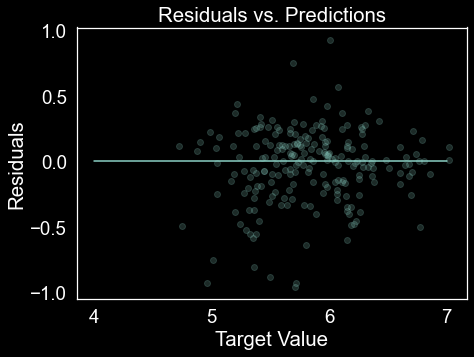

In [137]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_test['target_log'] - y_test_pred

plt.scatter(y_test_pred, lin_reg_residuals, alpha = 0.2)
plt.plot([4,7], [0, 0])
plt.title("Residuals vs. Predictions")
plt.xlabel('Target Value')
plt.ylabel('Residuals')
plt.gcf().set_size_inches(7, 5)

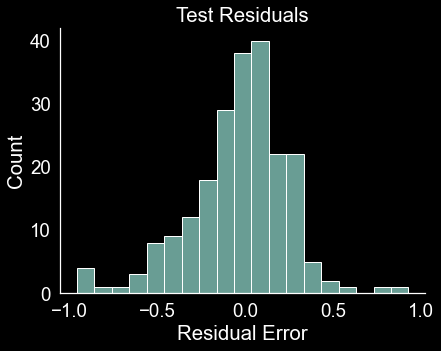

In [138]:
sns.displot(lin_reg_residuals)
plt.title("Test Residuals")
plt.xlabel('Residual Error')
plt.ylabel('Count')
plt.gcf().set_size_inches(7, 5)

In [139]:
y_test_pred = m.predict(X[shorter_features])
lin_reg_residuals = y['target_log'] - y_test_pred
sns.displot(lin_reg_residuals)
plt.title("Train+Val Residuals")
plt.xlabel('Residual Error')
plt.ylabel('Count')
plt.gcf().set_size_inches(7, 5)

In [140]:
y_test_pred = m.predict(X_test[shorter_features])

In [141]:
test_results = X_test_n.copy()
test_results['y_test'] = y_test['target_log']
test_results['y_pred'] = y_test_pred

In [142]:
test_results.sample(20).sort_values(by = 'y_test')

movie_title  domestic_total_gross  \
26                        Boo 2! A Madea Halloween             -0.369142   
365                                Forever My Girl             -0.681449   
563                                     Straw Dogs             -0.742527   
687                                 God's Not Dead             -0.233533   
223                    Keeping Up with the Joneses             -0.696302   
746                                 Daddy's Home 2              0.203220   
854                                         Trolls              0.704608   
414  Legend of the Guardians: The Owls of Ga'Hoole             -0.284809   
188                 Percy Jackson: Sea of Monsters             -0.154771   
417                                  Run All Night             -0.579657   
773                                       R.I.P.D.             -0.507421   
548                                 The Last Stand             -0.725108   
380             Madagascar 3: Europe's Most Wanted              1.337270   
659                 Hansel & Gretel: Witch Hunters             -0.284525   
71                                      Uncut Gems             -0.341849   
91                                       John Wick             -0.412357   
346                     Captain America: Civil War              3.271991   
471            Captain America: The Winter Soldier              1.775047   
572                        Titanic 2012 3D Release             -0.262516   
774                        Guardians of the Galaxy              2.515961   

     international_gross  runtime_minutes    budget   opening  widest_release  \
26             -0.674853        -0.513686 -0.656153 -0.171121       -0.806981   
365            -0.595535        -0.115579 -0.997478 -0.679992       -2.012852   
563            -0.675732        -0.001835 -0.656153 -0.653678       -0.781885   
687            -0.659891         0.168782 -1.021292 -0.779599       -1.469520   
223            -0.602566        -0.286196 -0.418019 -0.643558       -0.011432   
746            -0.284658        -0.570558  0.042374  0.081324        0.682477   
854             0.317259        -1.025537  0.931408  0.588656        1.298588   
414            -0.244309        -0.741175  0.217006 -0.324392        0.682477   
188            -0.002183        -0.229324  0.375762 -0.375670        0.061347   
417            -0.447221         0.225655 -0.259263 -0.477219        0.175534   
773            -0.449259        -0.798047  1.010786 -0.426901       -0.224750   
548            -0.492760        -0.172452 -0.338641 -0.618986       -0.148206   
380             2.059251        -0.854920  1.248920  1.000265        1.545786   
659             0.201025        -1.253026 -0.259263 -0.217149        0.431515   
71             -0.421798         1.419974 -0.751407 -0.807203       -0.433048   
91             -0.458192        -0.513686 -0.735531 -0.375224       -0.554764   
346             3.167742         2.102442  2.915859  4.560961        1.499358   
471             1.667478         1.476846  1.645811  2.040313        1.137973   
572             0.830544         4.775443  2.122079 -0.289234        0.806703   
774             1.589743         0.623761  1.645811  2.019251        1.326194   

     opening_rank  metascore       roi  ...  PG  PG-13  R  TV-PG  opening_low  \
26      -0.602233  -2.102258 -0.161100  ...   0      1  0      0            0   
365      1.288701  -0.976302  0.084433  ...   1      0  0      0            0   
563      0.028078  -0.442954 -0.210264  ...   0      0  1      0            0   
687     -0.182025  -2.161518  0.844282  ...   1      0  0      0            0   
223      0.448286  -1.094823 -0.200302  ...   0      1  0      0            0   
746     -0.392129  -1.331867 -0.138472  ...   0      1  0      0            0   
854     -0.392129   0.149654 -0.133268  ...   1      0  0      0            0   
414     -0.182025   0.031132 -0.167133  ...   1      0  0      0            0   
188     -0.

In [143]:
test_results.sample(6).sort_values(by = 'y_test')

movie_title  domestic_total_gross  international_gross  \
141  Walking with Dinosaurs 3D             -0.482620            -0.212955   
194        Unfinished Business             -0.743586            -0.658344   
164        Beautiful Creatures             -0.650403            -0.470457   
675      Paranormal Activity 2              0.008666            -0.201138   
914                        Tag             -0.294344            -0.559267   
577           Fast & Furious 6              1.562222             2.159783   

     runtime_minutes    budget   opening  widest_release  opening_rank  \
141        -1.309899  0.217006 -0.594698        0.265881      0.868493   
194        -1.082409 -0.497397 -0.664201       -0.318860      0.238182   
164         0.794378 -0.100507 -0.579995       -0.101778      0.238182   
675        -1.082409 -1.005416  0.411772        0.260861     -0.602233   
914        -0.570558 -0.608526 -0.359298        0.440299     -0.182025   
577         1.135612  1.487054  2.110780        0.928420     -0.602233   

     metascore       roi  ...  PG  PG-13  R  TV-PG  opening_low  opening_mid  \
141  -0.917041 -0.172725  ...   1      0  0      0            0            0   
194  -1.213345 -0.211402  ...   0      0  1      0            0            0   
164  -0.028128 -0.191938  ...   0      1  0      0            0            0   
675   0.031132  1.731803  ...   0      0  1      0            0            0   
914   0.208915 -0.132757  ...   0      0  1      0            0            0   
577   0.505219 -0.062022  ...   0      1  0      0            0            0   

     opening_high  opening_categories    y_test    y_pred  
141             1        high_opening  4.764678  5.243371  
194             1        high_opening  5.254551  5.064863  
164             1        high_opening  5.730836  5.815056  
675             1        high_opening  5.766781  6.171842  
914             1        high_opening  5.920083  5.707775  
577             1        high_opening  6.431735  6.606019  

[6 rows x 67 columns]

In [144]:
X_test.sort_values(by = 'movie_title').tail()

index                movie_title  domestic_total_gross  \
269    429  When the Game Stands Tall              30127963   
878   1371           White House Down              73103784   
408    645                      Wreck             189422889   
271    432                          X             146408305   
64     116                          X              65845974   

     international_gross  runtime_minutes rating release_date  \
269                10791            115.0     PG   2014-08-22   
878            132262953            131.0  PG-13   2013-06-28   
408            281800000            101.0     PG   2012-11-02   
271            206208385            131.0  PG-13   2011-06-03   
64             186597000            113.0  PG-13   2019-06-07   

                             distributor       budget       opening  ...  G  \
269                     TriStar Pictures   15000000.0  8.381509e+10  ...  0   
878    Sony Pictures Entertainment (SPE)  150000000.0  2.485226e+11  ...  0   
408  Walt Disney Studios Motion Pictures  165000000.0  4.903871e+11  ...  0   
271                Twentieth Century Fox  160000000.0  5.510160e+11  ...  0   
64                 Twentieth Century Fox  200000000.0  3.282835e+11  ...  0   

     Not Rated  PG  PG-13  R  TV-PG  opening_low  opening_mid  opening_high  \
269          0   1      0  0      0            0            0             1   
878          0   0      1  0      0            0            0             1   
408          0   1      0  0      0            0            0             1   
271          0   0      1  0      0            0            0             1   
64           0   0      1  0      0            0            0             1   

     opening_categories  
269        high_opening  
878        high_opening  
408        high_opening  
271        high_opening  
64         high_opening  

[5 rows x 64 columns]